<a href="https://colab.research.google.com/github/PremWoods/PremWoods.github.io/blob/main/LinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.039624613805255615


<ipython-input-68-cea6fb5c74ac>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ODA_2014'] = df4['ODA_2014'].astype(float)
<ipython-input-68-cea6fb5c74ac>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['ODA_2014'] = df4['ODA_2014']/1000000


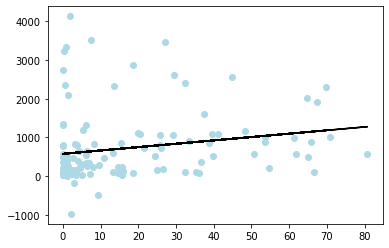

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Create my dataframe by joining two datasets - ODA received in 2014, and a measure of poverty, Extreme poverty 2017 ppp (>$2.15 a day)(nearest measure to 2014 recorded)

import pandas as pd

ODA = pd.read_csv("2014_ODA.csv")
Ext = pd.read_csv("ExtPov_Headcount.csv")

df = pd.merge(ODA, Ext, on='Country Name')

df2 = df[["Country Name","2014 [YR2014]","Closest to 2014"]].set_index("Country Name")

df2.rename(columns={'2014 [YR2014]': 'ODA_2014', 'Closest to 2014': 'ExtPov_%'}, inplace=True)

df3 = df2.replace("..", np.nan)

df4 = df3.dropna(axis=0)

df4['ODA_2014'] = df4['ODA_2014'].astype(float)

df4['ODA_2014'] = df4['ODA_2014']/1000000


X = np.array(df4["ExtPov_%"]).reshape(-1,1)
y = np.array(df4[ "ODA_2014"]).reshape(-1,1)

regr = LinearRegression()
  
regr.fit(X, y)
print(regr.score(X,y))


y2 = regr.predict(X)


plt.plot(X, y,'o', color ='lightblue');
plt.plot(X, y2, color ='black')

